In [1]:
#خواندن دیتا
import pandas as pd
Email_Data = pd.read_csv("C:\\Users\\ShahinN\\Desktop\\SMSSpamCollection.txt", sep= '\t', header=None, names=["Target", "Email"])

Email_Data.columns


Index(['Target', 'Email'], dtype='object')

In [2]:
Email_Data.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text

# پیش پردازش متن دیتاست (پیامک ها

In [4]:
#lowercase
Email_Data['Email'] =  Email_Data['Email'].apply(lambda x:  " ".join(x.lower() for x in x.split()))
# stopword filtering
stop = stopwords.words('english')
Email_Data['Email'] =  Email_Data['Email'].apply(lambda x: " ".join (x for x in x.split() if x not in stop))
#stemming
st = PorterStemmer()
Email_Data['Email'] =  Email_Data['Email'].apply(lambda x: " ".join ([st.stem(word) for word in x.split()]))
#lemmatize
Email_Data['Email'] =  Email_Data['Email'].apply(lambda x: " ".join ([Word(word).lemmatize() for word in x.split()]))
Email_Data.head()

,Target,Email
0,ham,"go jurong point, crazy.. avail bugi n great wo..."
1,ham,ok lar... joke wif u oni...
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor... u c alreadi say...
4,ham,"nah think goe usf, live around though"


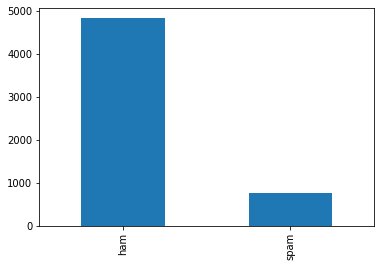

In [5]:
result=Email_Data['Target'].value_counts()
result.plot(kind='bar');

In [12]:
# بخش بندی دیتاست
train, test = train_test_split(Email_Data[['Email', 'Target']] , test_size=0.2)

# تعریف سری طول ها، ماکزیمم تعداد واژگان و ابعاد گنجاند یا امبدینگ

In [13]:
MAX_SEQUENCE_LENGTH = 300

In [14]:
# 20000 واژگان برتر
MAX_NB_WORDS = 20000

In [16]:
from keras.preprocessing.text import Tokenizer

#نحوه شناسایی واژگان معمولی  که موارد استفاده قرار میگیرند
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train.Email)
train_sequences = tokenizer.texts_to_sequences(train.Email)
test_sequences = tokenizer.texts_to_sequences(test.Email)

Using TensorFlow backend.


In [17]:
# dictionary containing words and their index
word_index = tokenizer.word_index
# print(tokenizer.word_index)
# total words in the corpus
print('Found %s unique tokens.' % len(word_index))

Found 7576 unique tokens.


In [19]:
from keras.preprocessing.sequence import pad_sequences

# get only the top frequent words on train
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)                         

In [20]:
# get only the top frequent words on test
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)


In [21]:
print(train_data.shape)
print(test_data.shape)

(4457, 300)
(1115, 300)


In [22]:
train_labels = train['Target']
test_labels = test['Target']

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

In [25]:
print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['ham' 'spam']
(array([0, 1]), array([3859,  598], dtype=int64))
(array([0, 1]), array([966, 149], dtype=int64))


In [28]:
from keras import utils as np_utils
from keras.utils import to_categorical
# changing data types
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (4457, 300)
Shape of label tensor: (4457, 2)
Shape of label tensor: (1115, 2)


In [29]:
EMBEDDING_DIM = 100
print(MAX_SEQUENCE_LENGTH)

300


# ساخت مدل شبکه عصبی CNN

In [30]:
# Import Libraries
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

In [31]:
print('Training CNN 1D model.')

Training CNN 1D model.


In [37]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [39]:
model.fit(train_data, labels_train ,validation_data=(test_data, labels_test), batch_size=64, epochs=5)


Train on 4457 samples, validate on 1115 samples
Epoch 1/5
4457/4457 [==============================] - 86s 19ms/step - loss: 0.3881 - accuracy: 0.8470 - val_loss: 0.4676 - val_accuracy: 0.8664
Epoch 2/5
4457/4457 [==============================] - 91s 20ms/step - loss: 0.1372 - accuracy: 0.9594 - val_loss: 0.9748 - val_accuracy: 0.8664
Epoch 3/5
4457/4457 [==============================] - 75s 17ms/step - loss: 0.0568 - accuracy: 0.9852 - val_loss: 1.0995 - val_accuracy: 0.8664
Epoch 4/5
4457/4457 [==============================] - 75s 17ms/step - loss: 0.0366 - accuracy: 0.9919 - val_loss: 0.9774 - val_accuracy: 0.8664
Epoch 5/5
4457/4457 [==============================] - 74s 17ms/step - loss: 0.0198 - accuracy: 0.9960 - val_loss: 0.8521 - val_accuracy: 0.8664


# RNN model

In [46]:
#import library
from keras.layers.recurrent import SimpleRNN

#model training
print('Training SIMPLERNN model.')

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))

model.add(SimpleRNN(2, input_shape=(None,1)))
model.add(Dense(2,activation='softmax'))

Training SIMPLERNN model.


In [47]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])


In [48]:
model.fit(train_data, labels_train, batch_size=16, epochs=5, validation_data=(test_data, labels_test))

Train on 4457 samples, validate on 1115 samples
Epoch 1/5
4457/4457 [==============================] - 54s 12ms/step - loss: 0.3455 - accuracy: 0.9446 - val_loss: 0.2078 - val_accuracy: 0.9848
Epoch 2/5
4457/4457 [==============================] - 53s 12ms/step - loss: 0.1159 - accuracy: 0.9915 - val_loss: 0.1419 - val_accuracy: 0.9740
Epoch 3/5
4457/4457 [==============================] - 62s 14ms/step - loss: 0.0513 - accuracy: 0.9969 - val_loss: 0.1246 - val_accuracy: 0.9740
Epoch 4/5
4457/4457 [==============================] - 55s 12ms/step - loss: 0.0271 - accuracy: 0.9991 - val_loss: 0.1216 - val_accuracy: 0.9668
Epoch 5/5
4457/4457 [==============================] - 56s 12ms/step - loss: 0.0165 - accuracy: 0.9996 - val_loss: 0.1190 - val_accuracy: 0.9668


In [49]:
# prediction on test data
predicted_Srnn=model.predict(test_data)
predicted_Srnn

array([[0.68528855, 0.31471145],
       [0.9151998 , 0.08480018],
       [0.995443  , 0.004557  ],
       ...,
       [0.9783735 , 0.02162646],
       [0.9677645 , 0.03223554],
       [0.84436935, 0.15563057]], dtype=float32)

In [50]:
#model evaluation
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted_Srnn.round())


In [51]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted_Srnn.round()))


precision: [0.96777442 0.95901639]
recall: [0.99482402 0.7852349 ]
fscore: [0.98111281 0.86346863]
support: [966 149]
############################
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.96      0.79      0.86       149

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.96      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115
 samples avg       0.97      0.97      0.97      1115



# ساخت مدل LSTM

In [52]:
#model training
print('Training LSTM model.')
model = Sequential()

model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(output_dim=16, activation='relu', inner_activation='hard_sigmoid',return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2,activation='softmax'))

Training LSTM model.


C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="relu", return_sequences=True, units=16, recurrent_activation="hard_sigmoid")`
  


In [53]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])


In [54]:
model.fit(train_data, labels_train, batch_size=16, epochs=5, validation_data=(test_data, labels_test))


Train on 4457 samples, validate on 1115 samples
Epoch 1/5
4457/4457 [==============================] - 299s 67ms/step - loss: 0.1342 - accuracy: 0.9545 - val_loss: 0.2203 - val_accuracy: 0.9184
Epoch 2/5
4457/4457 [==============================] - 293s 66ms/step - loss: 0.0184 - accuracy: 0.9951 - val_loss: 0.0745 - val_accuracy: 0.9812
Epoch 3/5
4457/4457 [==============================] - 401s 90ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0766 - val_accuracy: 0.9803
Epoch 4/5
4457/4457 [==============================] - 406s 91ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1059 - val_accuracy: 0.9812
Epoch 5/5
4457/4457 [==============================] - 415s 93ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1062 - val_accuracy: 0.9821


In [55]:
#prediction on text data
predicted_lstm=model.predict(test_data)
predicted_lstm

array([[1.4820095e-10, 1.0000000e+00],
       [9.9995458e-01, 4.5383797e-05],
       [1.0000000e+00, 2.9247932e-10],
       ...,
       [9.9998820e-01, 1.1766316e-05],
       [9.9436921e-01, 5.6307805e-03],
       [9.9959332e-01, 4.0665350e-04]], dtype=float32)

In [56]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(labels_test, predicted_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test,predicted_lstm.round()))


precision: [0.97971602 1.        ]
recall: [1.         0.86577181]
fscore: [0.9897541  0.92805755]
support: [966 149]
############################
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115
 samples avg       0.98      0.98      0.98      1115

